In [77]:
import pandas as pd
import plotly.express as px

In [3]:
df=pd.read_json(r"D:\Datasets\script-bag-of-words.json")

In [13]:
df.head()

,episodeAlt,seasonNum,episodeNum,episodeTitle,text
0,S1E1,1,1,Winter Is Coming,"[{'text': 'Easy, boy.', 'name': 'Will'}, {'tex..."
1,S1E2,1,2,The Kingsroad,"[{'text': 'And You child... drink, eat. need t..."
2,S1E3,1,3,Lord Snow,[{'text': 'Council. Grand Lord Maester Pycelle...
3,S1E4,1,4,"Cripples, Bastards, and Broken Things",[{'text': 'Lord's The again. been dreaming lit...
4,S1E5,1,5,The Wolf and the Lion,[{'text': 'Does Hugh Ser any capital? family h...


In [31]:
dialogues={}
for index,row in df.iterrows():
    for item in row["text"]:
        if item["name"] in dialogues:
            dialogues[item["name"]]=   dialogues[item["name"]]+ item["text"]
        else:
            dialogues[item["name"]]=item["text"]+" "


In [33]:
df=pd.DataFrame()
df["Name"]=dialogues.keys()
df["Script"]=dialogues.values()

In [42]:
df["no_of_words"]=df["Script"].apply(lambda x:len(x.split()))
new_df=df.sort_values("no_of_words",ascending=False)

In [45]:
new_df.shape

(817, 3)

In [46]:
new_df=new_df[new_df["no_of_words"]>500]

In [48]:
new_df.shape

(92, 3)

In [50]:
new_df.head(4)

,Name,Script,no_of_words
17,Tyrion Lannister,It Mmh. Northern about girls. is say the they ...,25924
13,Cersei Lannister,And And Casterly One Rock. When about afraid. ...,14294
3,Jon Snow,Father's Go on. watching. And mother. yourBran...,11488
20,Daenerys Targaryen,We've a and anything. asked been for for guest...,11202


In [102]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words="english")

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")


In [59]:
embeddings=cv.fit_transform(new_df["Script"]).toarray()
embeddings=embeddings.astype("float64")

In [60]:
embeddings[0]
# Each row in embeddings is a character.
# Each column is a word from the total vocabulary.

array([5., 1., 0., ..., 0., 0., 0.])

In [61]:
embeddings.shape

(92, 15194)

In [62]:
from sklearn.manifold import TSNE

In [63]:
tsne=TSNE(n_components=2,verbose=1,random_state=32)
output=tsne.fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 92 samples in 0.004s...
[t-SNE] Computed neighbors for 92 samples in 0.412s...
[t-SNE] Computed conditional probabilities for sample 92 / 92
[t-SNE] Mean sigma: 16.560709
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.040901
[t-SNE] KL divergence after 950 iterations: 0.251207


In [65]:
output.shape

(92, 2)

In [68]:
new_df["x_corr"]=output.T[0]
new_df["y_corr"]=output.T[1]

C:\Users\arman\AppData\Local\Temp\ipykernel_1944\4154376563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["x_corr"]=output.T[0]
C:\Users\arman\AppData\Local\Temp\ipykernel_1944\4154376563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_corr"]=output.T[1]


In [70]:
new_df.head()

,Name,Script,no_of_words,x_corr,y_corr
17,Tyrion Lannister,It Mmh. Northern about girls. is say the they ...,25924,4.836664,-0.385033
13,Cersei Lannister,And And Casterly One Rock. When about afraid. ...,14294,4.613709,-0.283049
3,Jon Snow,Father's Go on. watching. And mother. yourBran...,11488,4.430466,-0.464199
20,Daenerys Targaryen,We've a and anything. asked been for for guest...,11202,4.224955,0.166724
12,Jaime Lannister,"As I It's brother, duty feel it's much. my sho...",10823,4.416019,-0.305757


In [104]:
df.to_csv("Preprocess_data.csv")

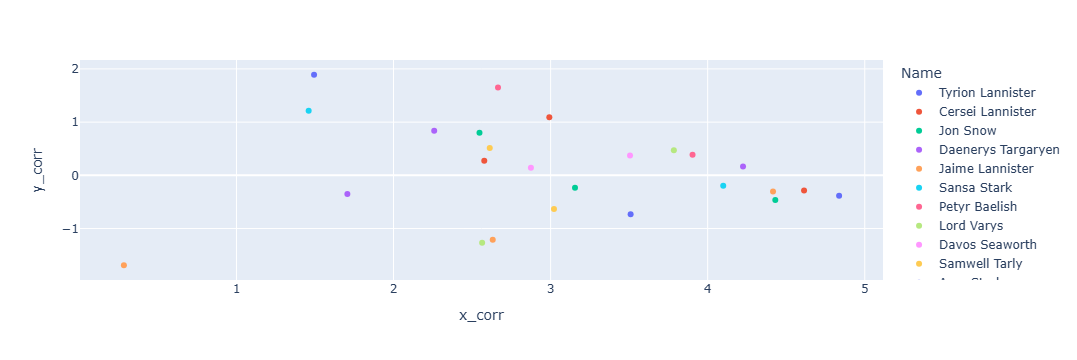

In [103]:
figure = px.scatter(new_df.head(25), x="x_corr", y="y_corr", color="Name")
figure.show()
